# Lect 4 : Scipy and Scikit Learn - I 

This lecture will touch upon the scientific module developed for Python called *Scipy*. This module has some very powerful and softicated methods that are used regularly in scientific reserach. 
The different methods available with scipy are : 

    - scipy.io          : For Input/Output
    - scipy.ndimage     : Image analysis                 [YES]
    - scipy.integrate   : Numerical integration          [YES]
    - scipy.fftpack     : Fast Fourier Transform
    - scipy.interpolate : Interpolation
    - scipy.optimize    : Curve fitting and optimisation [YES]
    - scipy.stats       : All the statistical functionalities.
    - scipy.constants   : All scientific constants       [YES]
    - scipy.linalg      : Routines for Linear Algebra.
    - scipy.special     : Routines to compute Special functions.

**scipy.constant**

In [40]:
import scipy.constants as sc_c

# The value of constants are in SI units.

print "Speed of Light       : %12.6e m/s"%sc_c.c
print "Planck Constant      : %12.6e m^2 kg/s"%sc_c.h
print "mass of an electron  : %12.6e kg"%sc_c.m_e
print "1 Parsec             : %12.6e m"%sc_c.parsec
print "1 AU                 : %12.6e m"%sc_c.astronomical_unit

# Also has some basic conversions.
print "nu : %12.6e Hz --> Lambda : %12.6e cm"%(5e9, 100.0*sc_c.nu2lambda(5e9))

# Many more things....
print sc_c.physical_constants['electron volt-joule relationship']
    

Speed of Light       : 2.997925e+08 m/s
Planck Constant      : 6.626070e-34 m^2 kg/s
mass of an electron  : 9.109384e-31 kg
1 Parsec             : 3.085678e+16 m
1 AU                 : 1.495979e+11 m
nu : 5.000000e+09 Hz --> Lambda : 5.995849e+00 cm
(1.6021766208e-19, 'J', 9.8e-28)


**scipy.integrate**

- Integrating functions, given function object
       quad, dblquad, tplquad, quadrature, romberg, newton_cotes
    
- Integrating functions, given fixed samples
        trapz, simps, romb 
        
- Integrators of ODE systems
        odeint

(-29.884459351766203, 4.3360657286939386e-09)
(-29.884459351428223, 7.665669144966343e-12)


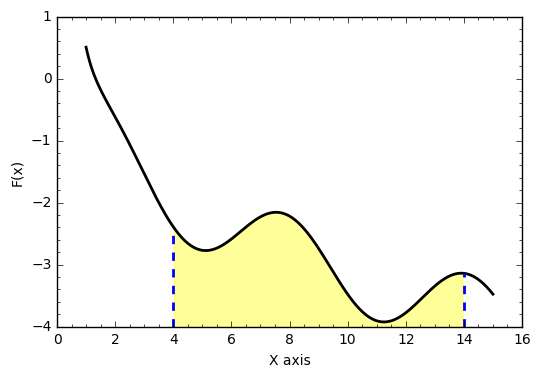

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as sc_integ

# Define a function.
def IntFunc(x):
    return 1./x**2 + 0.6*np.sin(x) - np.sqrt(x)

#Plot the function.
x = np.linspace(1.0, 15.0,256)
y = IntFunc(x)
plt.plot(x, y, 'k', lw=2)
plt.plot([4.0,4.0],[-4.0,IntFunc(4.0)], 'b--',lw=2)
plt.plot([14.0,14.0],[-4.0,IntFunc(14.0)], 'b--',lw=2)
in1 = np.abs(x-4.0).argmin()
in2 = np.abs(x-14.0).argmin()
plt.fill_between(x[in1:in2], -4.0, IntFunc(x[in1:in2]),color='yellow',alpha=0.4)
plt.xlabel(r'X axis')
plt.ylabel(r'F(x)')
plt.minorticks_on()


# Integrate.
ans_q1 = sc_integ.quadrature(IntFunc, 4.0, 14.0, rtol=1.0e-8)
ans_q2 = sc_integ.quad(IntFunc, 4.0, 14.0)
print ans_q1
print ans_q2

Trapezoidal rule : 9.288650e+00
simpson's rule : 9.288038e+00


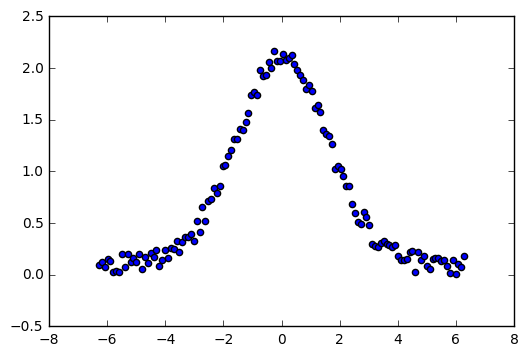

In [130]:
x = np.linspace(-2.0*np.pi, 2.0*np.pi,128)
y = 2.0*np.exp(-x*x/5.0) + 0.2*np.random.rand(128)
plt.scatter(x, y)

print "Trapezoidal rule : %12.6e"%sc_integ.trapz(y,x=x)
print "simpson's rule : %12.6e"%sc_integ.simps(y,x=x)


**scipy.ndimage**

Very much useful in astronomy specially for filtering images and convulation. 

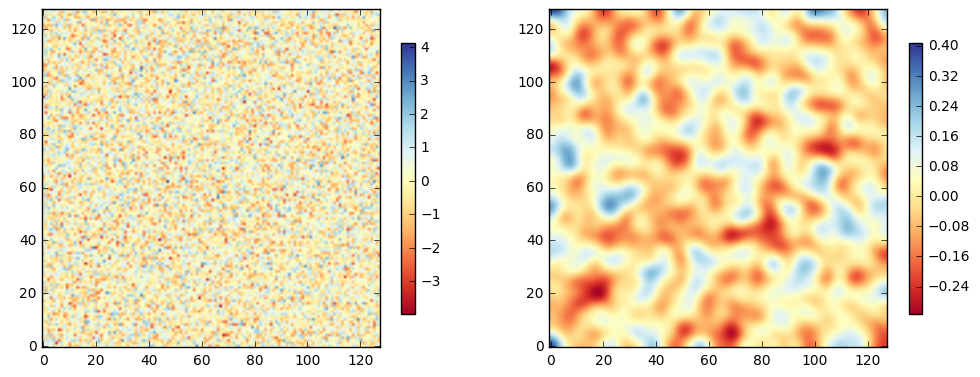

In [151]:
import scipy.ndimage as sc_ndimg
np.random.seed(1289)
img = np.random.randn(128,128)

f1 = plt.figure(figsize=[12,5])
ax1 = plt.subplot(121)
im1 = ax1.imshow(img, origin='image',cmap=plt.get_cmap('RdYlBu'))
plt.colorbar(im1, shrink=0.7)

ax2 = plt.subplot(122)
img_g = sc_ndimg.filters.gaussian_filter(img,sigma=3.0)
im2 = ax2.imshow(img_g, origin='image',cmap=plt.get_cmap('RdYlBu'))
plt.colorbar(im2,shrink=0.7)

**scipy.optimize**

Very useful tool for curve fitting both in 1D and 2D. Especially in case you have multi-parameter fit to be performed. Also has method for root finding.

In [154]:
import scipy.optimize as sc_opt
sc_opt?

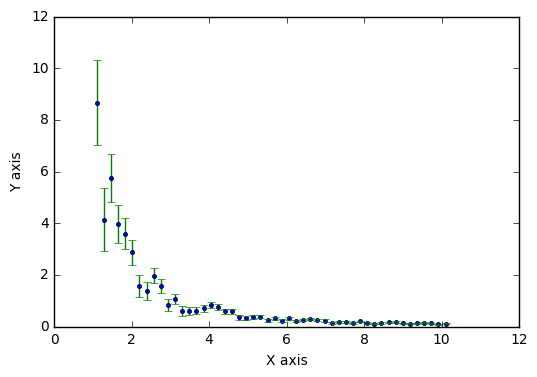

In [231]:
np.random.seed(1894)
# Power Law data. 

powerlaw = lambda x, amp, index: amp*(x**index)

npts = 50
xdata = np.linspace(1.1,10.1,npts)
ydata = powerlaw(xdata, 10.0, -2.0)      # This is exact data
yerr  = 0.2*ydata                        # Some error

ydata += np.random.randn(npts) * yerr    # simulated noisy data

plt.plot(xdata, ydata, 'o',markersize=3)
plt.errorbar(xdata, ydata,yerr, fmt='none')
plt.xlabel(r'X axis')
plt.ylabel(r'Y axis')

[ 9.78912964 -1.95199441]
[ 0.4139334   0.08664355]


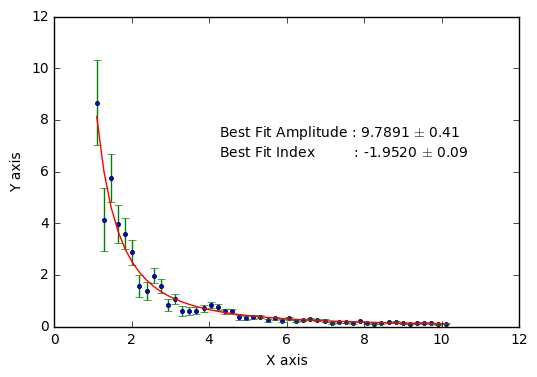

In [232]:
# Now fitting the data using scipy optimize.
coeffp, covarp = sc_opt.curve_fit(powerlaw, xdata, ydata)
print coeffp
coeffp_err = np.sqrt(np.diag(covarp))
print coeffp_err

plt.plot(xdata, ydata, 'o',markersize=3)
plt.errorbar(xdata, ydata,yerr, fmt='none')
plt.xlabel(r'X axis')
plt.ylabel(r'Y axis')
plt.plot(xdata, powerlaw(xdata, *coeffp), 'r')
plt.figtext(0.4, 0.6, r'Best Fit Amplitude : %.4f $\pm$ %.2f'%(coeffp[0], coeffp_err[0]))
plt.figtext(0.4, 0.55, r'Best Fit Index         : %.4f $\pm$ %.2f'%(coeffp[1], coeffp_err[1]))

True parameters:  [1, 0.3, 0.7, 2, 3, 4]
Predicted params: [ 1.   0.3  0.7  2.   3.   4. ]
Residual, RMS(obs - pred): 4.40678948963e-17


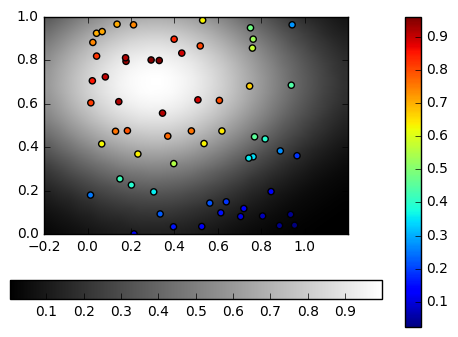

In [270]:
def Gauss2d(xy, amp, x0, y0, a, b, c):
    x, y = xy
    inner = a * (x - x0)**2
    inner += 2 * b * (x - x0)**2 * (y - y0)**2
    inner += c * (y - y0)**2
    return amp * np.exp(-inner)

def GenerateNoisyData(num, params):
    np.random.seed(1977) # For consistency
    xy = np.random.random((2, num))

    zobs = Gauss2d(xy, *params)
    return xy, zobs

def Gauss2DPlot(xy, zobs, pred_params):
    x, y = xy
    plt.scatter(x, y, c=zobs)
    plt.colorbar()
    yi = np.linspace(0.0,1.0,30)
    xi = np.linspace(-0.2,1.2,30)
    X, Y = np.meshgrid(xi, yi)
    xyi = np.vstack([X.ravel(), Y.ravel()])
    zpred = Gauss2d(xyi, *pred_params)
    zp2D = zpred.reshape(X.shape)
    im2 = plt.imshow(zp2D, origin='image', extent=[xi.min(), xi.max(), yi.min(), yi.max()]
              ,cmap=plt.cm.gray)
    plt.colorbar(im2, orientation='horizontal')

np.random.seed(1985)
x0, y0 = 0.3, 0.7
amp, a, b, c = 1, 2, 3, 4
true_params = [amp, x0, y0, a, b, c]
xy, zobs = GenerateNoisyData(60, true_params)    # Thats the data. 
x, y = xy

i = zobs.argmax()       # Index in the array where zobs is max. 

guess = [1, x[i], y[i], 1, 1, 1]
pred_params, uncert_cov = sc_opt.curve_fit(Gauss2d, xy, zobs, p0=guess)

zpred = Gauss2d(xy, *pred_params)               # Predicted value.
print 'True parameters: ', true_params
print 'Predicted params:', pred_params
print 'Residual, RMS(obs - pred):', np.sqrt(np.mean((zobs - zpred)**2))
Gauss2DPlot(xy, zobs, pred_params)

# Scikit Learn - Basics & Terminology 
- Reference : Machine Learning course by Jake Vanderplas.
- scikit-learn tutorials.


## Outline

**Main Goal:** To introduce the central concepts of machine learning, and how they can be applied in Python using the Scikit-learn Package.

- Definition of machine learning
- Data representation in scikit-learn
- Introduction to the Scikit-learn API

## About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

For this short introduction, I'm going to stick two main problems --
    - Regression Problems
    - Classicfication Tasks.

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.


## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an **Estimator** object. For instance a linear regression is implemented as so:

In [271]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [301]:
# define an Estimator object for LinearRegression with parameters.
model = LinearRegression(normalize=True)

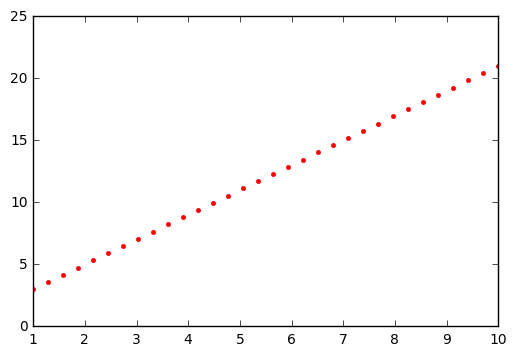

In [302]:
#Lets define a basic model.
x = np.linspace(1.0,10.0,32)
y = 2.0*x + 1.0
plt.plot(x, y, 'r.')

[ 2.]
1.0
5.95158575134e-29


/Library/Python/2.7/site-packages/scikit_learn-0.17.1-py2.7-macosx-10.10-intel.egg/sklearn/utils/__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


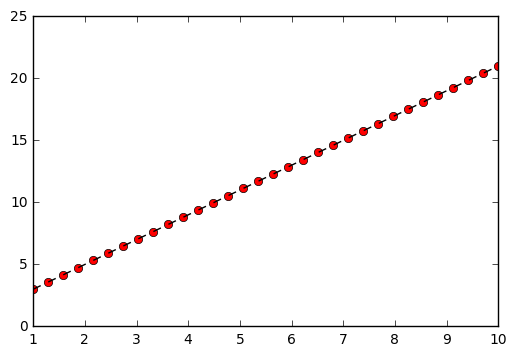

In [304]:
#VERY IMPORTANT : to fit the model we need to give Indepent variable 
# as 2D array. 

X = x[:,np.newaxis]
model.fit(X, y)
print model.coef_
print model.intercept_
print model.residues_

X_fit = np.linspace(1.,10.,100)[:,np.newaxis]
Y_fit = model.predict(X_fit)
plt.plot(X.squeeze(), y, 'ro')
plt.plot(X_fit.squeeze(), Y_fit, 'k--')


## Quick Exercise

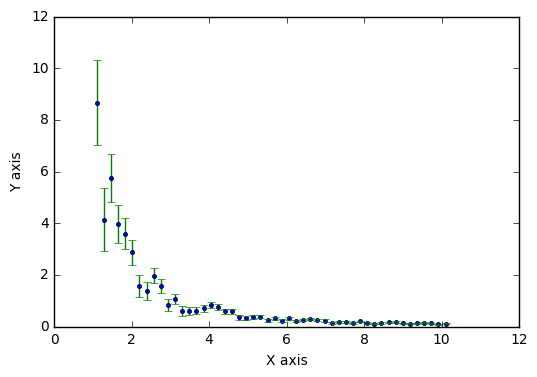

In [299]:
# Using the some simple data
np.random.seed(1894)
# Power Law data. 

powerlaw = lambda x, amp, index: amp*(x**index)

npts = 50
xdata = np.linspace(1.1,10.1,npts)
ydata = powerlaw(xdata, 10.0, -2.0)      # This is exact data
yerr  = 0.2*ydata                        # Some error

ydata += np.random.randn(npts) * yerr    # simulated noisy data

plt.plot(xdata, ydata, 'o',markersize=3)
plt.errorbar(xdata, ydata,yerr, fmt='none')
plt.xlabel(r'X axis')
plt.ylabel(r'Y axis')

In [292]:
#Develop a LinearRegressor model to fit this data and also 
#plot alongside the fitted curve. 
